# Customer Churn Analysis in Telco Corp

# Latar Belakang

Wina Telekomunikasi merupakan perusahaan Telekomunikasi yang sudah mempunyai banyak cabang. Sejak berdiri pada tahun 2019, Wina Telekomunikasi konsisten untuk memperhatikan customer experience perusahaannya dengan tujuan agar pelanggan tidak beralih kepada pesaing dan menjadi pelanggan tetap provider telekomunikasi Wina Telekomunikasi

Walaupun baru berumur 1 tahun, Wina Telekomunikasi sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

# Langkah Analisa Data

1. Melakukan Exploratory Data Analysis
2. Melakukan Data Pre-Processing
3. Melakukan Pemodelan Machine Learning
4. Menentukan Model Terbaik

# Library yang Digunakan untuk Analisa Data

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

A. Pandas (Python for Data Analysis) 
merupakan library Python yang fokus untuk proses analisis data seperti manipulasi data, 
1. persiapan data, dan pembersihan data.
2. read_csv() digunakan untuk membaca file csv
3. replace() digunakan untuk mengganti nilai
4. value_counts() digunakan untuk mengitung unik dari kolom
5. drop() digunakan untuk menghapus
6. describe() digunakan untuk melihat deskripsi datanya
7. value_counts() digunakan untuk mengitung unik dari kolom

B. Matplotlib 
merupakan library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
1. figure() digunakan untuk membuat figure gambar baru
2. subplots()digunakan untuk membuat gambar dan satu set subplot
3. title()digunakan untuk memberi judul pada gambar
4. ylabel()digunakan untuk memberi label sumbu Y pada gambar
5. xlabel()digunakan untuk memberi label sumbu Y pada gambar
6. pie()digunakan untuk membuat pie chart
6. Seaborn membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat lebih cantik.
7. countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
8. heatmap() Plot rectangular data as a color-encoded matrix

C. Scikit-learn 
merupakan library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.
1. LabelEncoder() digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1
2. train_test_split() digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)
3. LogisticRegression() digunakan untuk memanggil algoritma Logistic Regression
4. RandomForestClassifier() digunakan untuk memanggil algoritma Random Forest Classifier
5. confusion_matrix() digunakan untuk membuat confusion matrix
6. classification_report() digunakan untuk membuat classification report, yang dianataranya berisi akurasi model
7. Xgboost adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)
8. XGBClassifier() digunakan untuk memanggil algoritma XG Boost Classifier
Pickle mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python.
9. dump() digunakan untuk menyimpan


# Importasi Library yang dibutuhkan

In [2]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

# Dataset yang digunakan

Untuk detil datanya adalah sebagai berikut:

1. UpdatedAt Periode of Data taken
2. customerID Customer ID
3. gender Whether the customer is a male or a female (Male, Female)
4. SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)
5. Partner Whether the customer has a partner or not (Yes, No)
6. tenure Number of months the customer has stayed with the company
7. PhoneService Whether the customer has a phone service or not (Yes, No)
8. InternetService Customer’s internet service provider (Yes, No)
9. StreamingTV Whether the customer has streaming TV or not (Yes, No)
10. PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
11. MonthlyCharges The amount charged to the customer monthly
12. TotalCharges The total amount charged to the customer
13. Churn Whether the customer churned or not (Yes, No)

# Importasi Data dan Melihat Data

In [8]:
import pandas as pd

#import dataset
wina_telekomunikasi = pd.read_csv('telco_final.csv')

#Tampilkan bentuk dari dataset
print(wina_telekomunikasi.shape)

#Tampilkan 5 data teratas
print(wina_telekomunikasi.head())

#Tampilkan jumlah ID yang unik
print(wina_telekomunikasi.customerID.nunique())

#Tampilkan Struktur Data
wina_telekomunikasi.dtypes

(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

UpdatedAt             int64
customerID            int64
gender               object
SeniorCitizen        object
Partner              object
tenure                int64
PhoneService         object
StreamingTV          object
InternetService      object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara antara lain:

1. Univariat Analysis — analisis deskriptif dengan satu variabel.
2. Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
3. Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, melihat persebaran dari:

1. Prosentase persebaran data Churn dan tidaknya dari seluruh data
2. Persebarang data dari variable predictor terhadap label (Churn)

In [9]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Prosentasi Churn

fungsi value_counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart

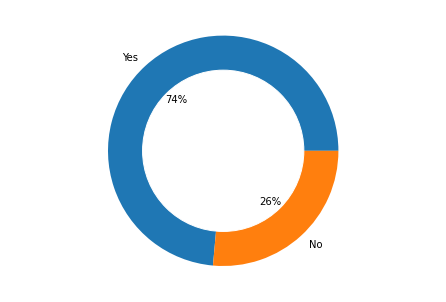

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wina_telekomunikasi = pd.read_csv('telco_final.csv')

#Membuat Visualisasi
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = wina_telekomunikasi.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
donat = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(donat)
plt.show()


# Exploratory Data Analysis (EDA) Variabel Numerik

Exploratory Data Analysis (EDA) Variabel Numerik
Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya dan menggunakan fungsi subplots

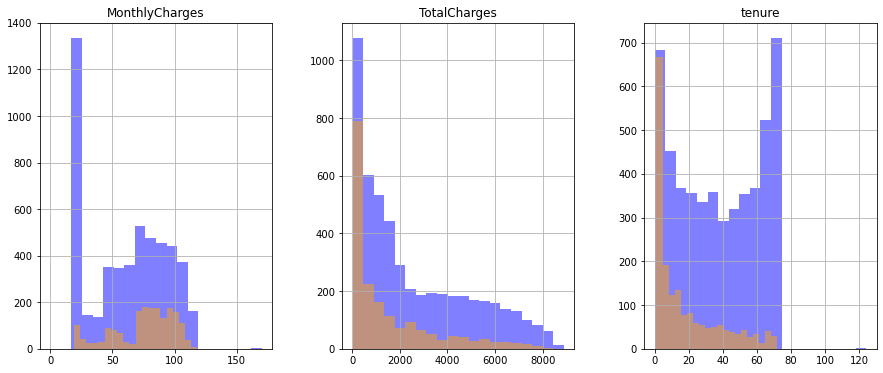

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wina_telekomunikasi = pd.read_csv('telco_final.csv')

# Membuat bin dalam chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Membuat chart
wina_telekomunikasi[wina_telekomunikasi.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
wina_telekomunikasi[wina_telekomunikasi.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

# Exploratory Data Analysis (EDA) Variabel Kategorik

Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya dan gunakan fungsi `countplot()` untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable

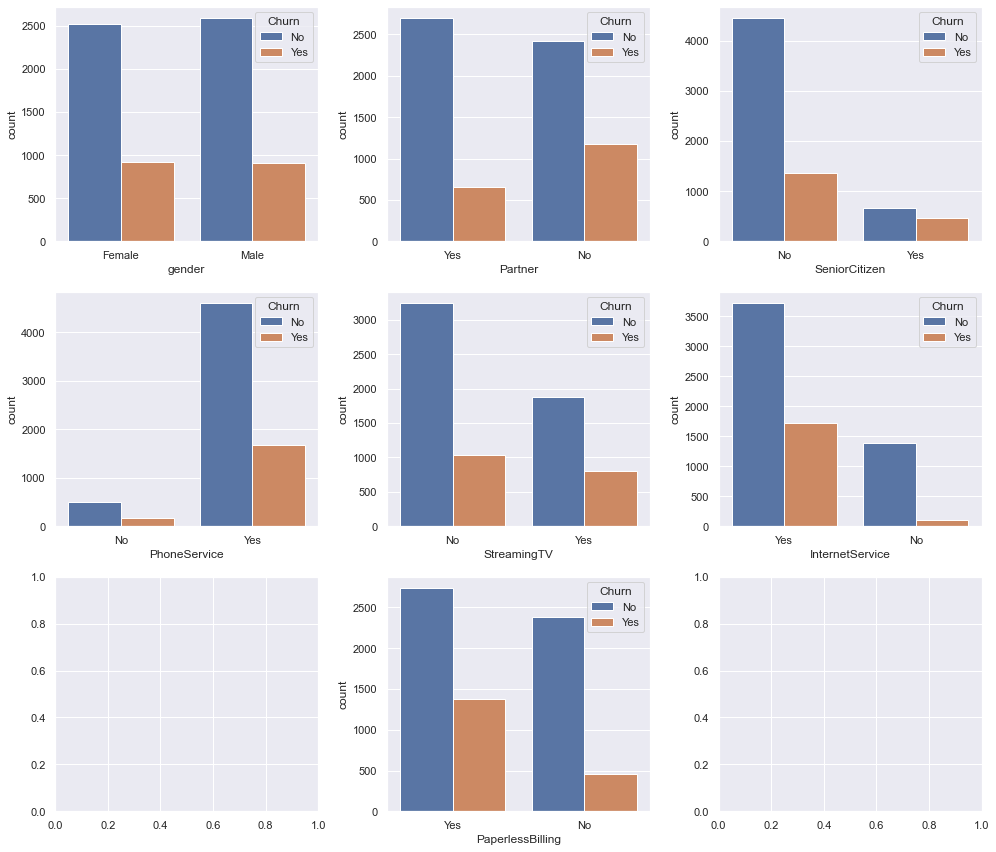

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
wina_telekomunikasi= pd.read_csv('telco_final.csv')

# Visualisasi Data
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=wina_telekomunikasi, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=wina_telekomunikasi, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=wina_telekomunikasi, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=wina_telekomunikasi, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=wina_telekomunikasi, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=wina_telekomunikasi, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=wina_telekomunikasi, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

# Kesimpulan 1

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

1. pada tahap C.1 dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.
2. pada tahap C.2 dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.
3. pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

# Menghapus Kolom yang tidak dibutuhkan untuk Pemodelan

Selanjutnya kita akan mengapus kolom yang tidak akan diikutsertakan dalam pemodelan, kemudian simpan dengan nama cleaned_df. Tampilkan 5 rows teratas nya.
Gunakan drop() untuk menghapus kolom dari suatu data

In [21]:
import pandas as pd
wina_telekomunikasi = pd.read_csv('telco_final.csv')

#Menghapus Kolom yang tidak dibutuhkan untuk Pemodelan customerID & UpdatedAt
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)
print(bersihkan_winatelkom.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


# Encoding Data

Gunakan data dari hasil dan analisa sebelumnya bersihkan_winatelkom, untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric menggunakan LabelEncoder(). Gunakan describe() untuk melihat deskripsi datanya.

In [23]:
import numpy as np
import pandas as pd
wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

from sklearn.preprocessing import LabelEncoder

#Convert all the non-numeric columns to numerical data types
for column in bersihkan_winatelkom.columns:
	if bersihkan_winatelkom[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])
print(bersihkan_winatelkom.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

<ipython-input-23-c08c035478c3>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


# Splitting Dataset

Gunakan data dari hasil dan analisa sebelumnya bersihkan_winatelkom, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). Gunakan train_test_split() untuk membagi data tersebut. Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya. Simpan hasil spliting data menjadi x_train, y_train, x_test & y_test

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

from sklearn.model_selection import train_test_split
# Predictor dan target
X = bersihkan_winatelkom.drop('Churn', axis = 1)
y = bersihkan_winatelkom['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


<ipython-input-24-37e7e3ead097>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


# Kesimpulan 2

Setelah kita analisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (customerID) & periode pengambilan datanya (UpdatedAt), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

# Pembuatan Model

Selanjutnya kita akan membuat model dengan menggunakan Algoritma Logistic Regression. Gunakan LogisticRegression() memanggil algoritma tersebut, fit ke data train dan simpan sebagai log_model

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train,y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


<ipython-input-26-4049ec7493f4>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue
C:\Users\HALAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Performansi Model Training - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression().fit(x_train, y_train)

from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.79      0.80      0.79      4865



<ipython-input-30-bba6dd94f591>:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue
C:\Users\HALAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Performansi Model Training - Menampilkan Plots

Setelah mendapatkan hasil classification report pada tahap sebelumnya, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

<ipython-input-31-976da5d563ad>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue
C:\Users\HALAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


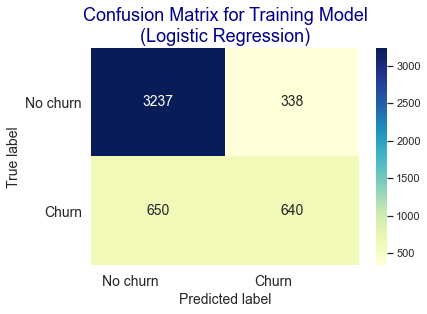

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression().fit(x_train, y_train)

from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Performansi Data Testing - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression().fit(x_train, y_train)

# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



<ipython-input-32-e87c4509211a>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue
C:\Users\HALAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Performansi Data Testing - Menampilkan Plots

Setelah menampilkan metrics pada tahap sebelumnya, sekarang kita akan melakukan visualisasi dari metrics yang sudah dihasilkan sebelumnya

<ipython-input-33-77ae76ec7798>:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue
C:\Users\HALAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


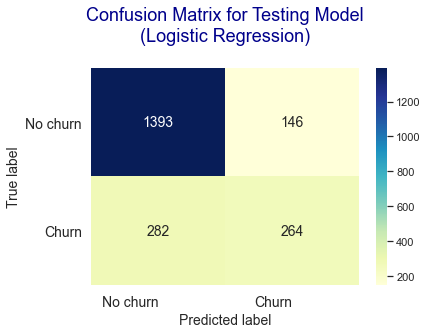

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression().fit(x_train, y_train)

# Predict
y_test_pred = log_model.predict(x_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Kesimpulan 3

Dari hasil dan analisa di atas, maka:

1. Jika kita menggunakan menggunakan algoritma logistic regression dengan memanggil LogisticRegression() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
2. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan churn yang sebenernya benar churn adalah 638, tebakan tidak churn yang sebenernya tidak churn adalah 3237, tebakan tidak churn yang sebenernya benar churn adalah 652 dan tebakan churn yang sebenernya tidak churn adalah 338.
3. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 264, tebakan tidak churn yang sebenernya tidak churn adalah 1392, tebakan tidak churn yang sebenernya benar churn adalah 282 dan tebakan churn yang sebenernya tidak churn adalah 146.

# Pembuatan Model

Selanjutnya kita akan membuat model dengan menggunakan Algoritma Random Forest Classifier.Gunakan RandomForestClassifier() memanggil algoritma tersebut, fit ke data train dan simpan sebagai rdf_model

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

<ipython-input-34-df2fe9cae5c5>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


RandomForestClassifier()


# Performansi Data Training - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

<ipython-input-35-b0eda66df444>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



# Performansi Data Training - Menampilkan Plots

Setelah menampilkan metrics pada tahap sebelumnya, selanjutnya kita akan melakukan visualisasi terhadap metrics tersebut 

<ipython-input-36-22851c606628>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


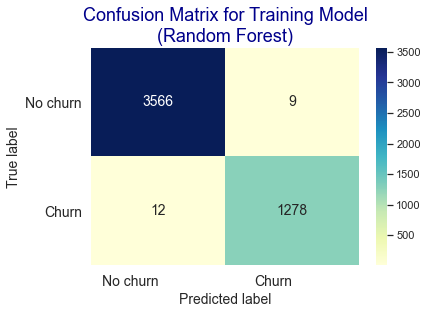

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
y_train_pred = rdf_model.predict(x_train)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Performansi Data Testing - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

wina_telekomunikasi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rdf_model = RandomForestClassifier().fit(x_train, y_train)

# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

<ipython-input-37-c2260b03ff0d>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.60      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



# Performansi Data Testing - Menampilkan Plots

Tampilkan visualisasi dari hasil metrics yang sudah diperoleh pada tahap sebelumnya

<ipython-input-38-24f0f96f1599>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


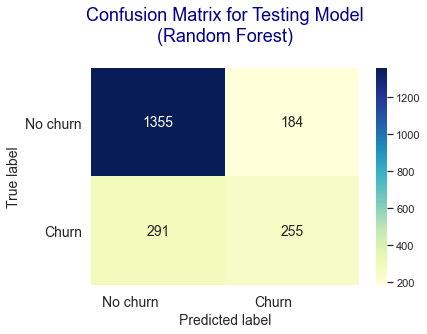

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

wina_telekomunikasi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rdf_model = RandomForestClassifier().fit(x_train, y_train)

# Predict
y_test_pred = rdf_model.predict(x_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()Tampilkan visualisasi dari hasil metrics yang sudah diperoleh pada tahap sebelumnya

# Kesimpulan 4

Dari hasil dan analisa di atas, maka:

1. Jika kita menggunakan menggunakan algoritma Random Forest dengan memanggil RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
2. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan churn yang sebenernya benar churn adalah 1278, tebakan tidak churn yang sebenernya tidak churn adalah 3566, tebakan tidak churn yang sebenernya benar churn adalah 12 dan tebakan churn yang sebenernya tidak churn adalah 9.
3. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 262, tebakan tidak churn yang sebenernya tidak churn adalah 1360, tebakan tidak churn yang sebenernya benar churn adalah 284 dan tebakan churn yang sebenernya tidak churn adalah 179.

# Pembuatan Model

Selanjutnya kita akan membuat model dengan menggunakan Algoritma Gradient Boosting Classifier.
Gunakan GradientBoostingClassifier() memanggil algoritma tersebut, fit ke data train dan simpan sebagai gbt_model

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

<ipython-input-41-5f04daec0d62>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


GradientBoostingClassifier()


# Perfomansi Model Data Training - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

<ipython-input-42-833601d57890>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



# Perfomansi Model Data Training - Menampilkan Plots

Tampilkan visualisasi dari metrics yang sudah dihasilkan sebelumnya 

<ipython-input-43-aaeab668563f>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


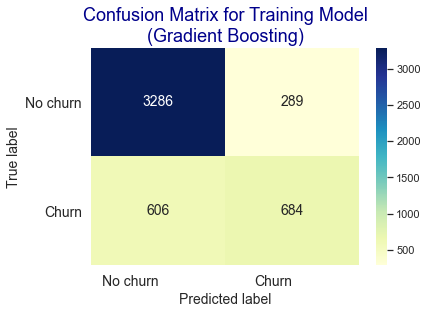

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

wina_telekomunikasi = pd.read_csv('telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_train_pred = gbt_model.predict(x_train)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Performansi Model Data Testing - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

wina_telekomunikasi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

<ipython-input-44-51387d38a3d0>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



# Performansi Model Data Testing - Menampilkan Plots

Buatlah visualisasi dari metrics yang sudah dihasilkan sebelumnya

<ipython-input-45-703a46331a19>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue


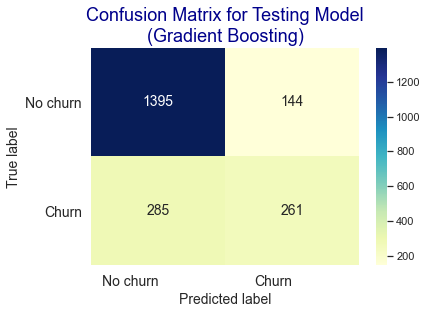

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

wina_telekomunikasi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_test_pred = gbt_model.predict(x_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Kesimpulan 5

Dari hasil dan analisa di atas, maka:

1. Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
2. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.
3. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1394, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 145.

# Menentukan Algoritma Model Terbaik

Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

1. Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
2. Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
3. Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

wina_telekomunikasidf_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
bersihkan_winatelkom = wina_telekomunikasi.drop(['customerID','UpdatedAt'], axis=1)

for column in bersihkan_winatelkom.columns:
    if bersihkan_winatelkom[column].dtype == np.number: continue
    bersihkan_winatelkom[column] = LabelEncoder().fit_transform(bersihkan_winatelkom[column])

X = bersihkan_winatelkom.drop('Churn', axis = 1) 
y = bersihkan_winatelkom['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression().fit(x_train, y_train)

print(log_model)

LogisticRegression()


<ipython-input-46-001a1f5d1732>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bersihkan_winatelkom[column].dtype == np.number: continue
C:\Users\HALAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Kesimpulan Final

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.